Practical 3


In [1]:
# ----------------------------------------
# 1. IMPORT REQUIRED LIBRARIES
# ----------------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ----------------------------------------
# 2. LOAD AND PREPROCESS DATA (STAGE 1)
# ----------------------------------------
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Train:", x_train.shape, y_train.shape)
print("Test:", x_test.shape, y_test.shape)

# Normalize pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Class names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

Train: (50000, 32, 32, 3) (50000, 1)
Test: (10000, 32, 32, 3) (10000, 1)


In [3]:
# ----------------------------------------
# 3. MODEL ARCHITECTURE (STAGE 2)
# ----------------------------------------
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding="same",
                  input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3,3), activation='relu', padding="same"),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding="same"),
    layers.Conv2D(64, (3,3), activation='relu', padding="same"),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

c:\Users\Harshvardhan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# ----------------------------------------
# 4. COMPILE THE MODEL
# ----------------------------------------
model.compile(
    optimizer='adam',                       # Better than SGD
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
# ----------------------------------------
# 5. TRAIN THE MODEL (STAGE 3)
# ----------------------------------------
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.4490 - loss: 1.5136 - val_accuracy: 0.6096 - val_loss: 1.1022
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.6079 - loss: 1.1023 - val_accuracy: 0.6558 - val_loss: 0.9638
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6692 - loss: 0.9435 - val_accuracy: 0.7076 - val_loss: 0.8376
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 0.7071 - loss: 0.8410 - val_accuracy: 0.7213 - val_loss: 0.7918
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.7329 - loss: 0.7637 - val_accuracy: 0.7394 - val_loss: 0.7571
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.7516 - loss: 0.7057 - val_accuracy: 0.7554 - val_loss: 0.7157
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7692 - loss: 0.6602 - val_accuracy: 0.7564 - val_loss: 0.7121
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7824 - loss: 0.6169 - 

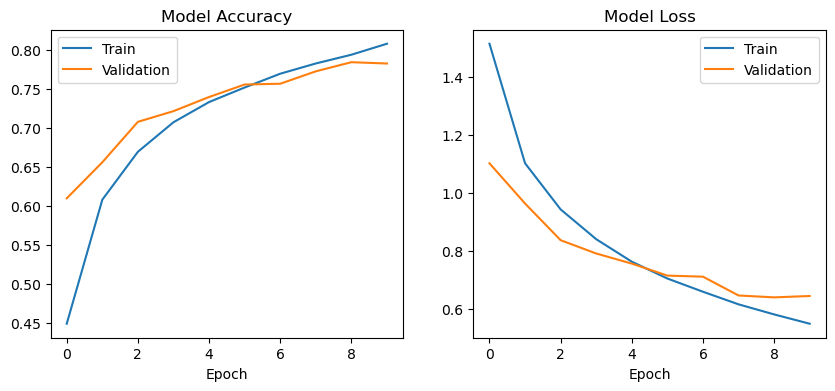

In [6]:
# ----------------------------------------
# 6. PLOT TRAINING METRICS
# ----------------------------------------
plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.show()

In [7]:
# ----------------------------------------
# 7. MODEL EVALUATION (STAGE 4)
# ----------------------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 2s - 7ms/step - accuracy: 0.7823 - loss: 0.6455
Test accuracy: 0.7822999954223633


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


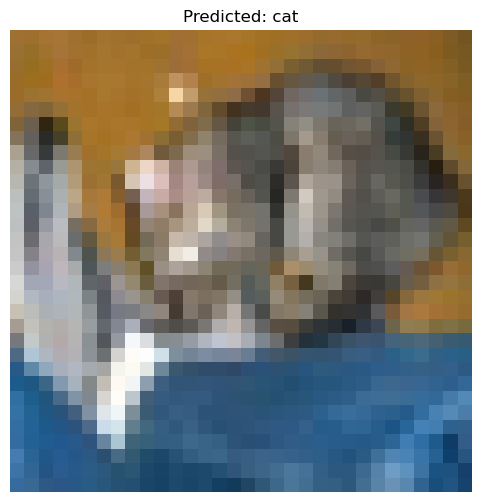

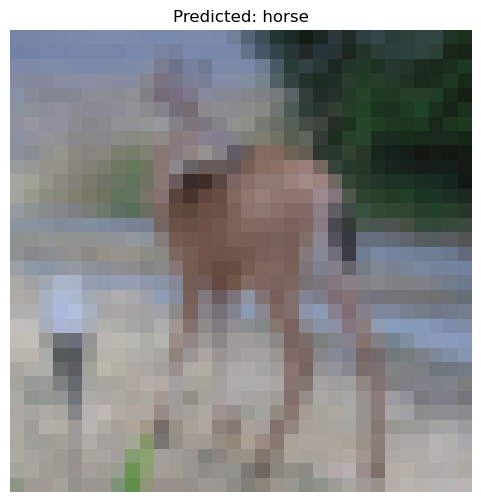

In [8]:
# ----------------------------------------
# 8. SAMPLE PREDICTIONS
# ----------------------------------------
predictions = model.predict(x_test)

plt.figure(figsize=(6,6))
plt.imshow(x_test[0])
plt.title("Predicted: " + class_names[np.argmax(predictions[0])])
plt.axis('off')
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(x_test[100])
plt.title("Predicted: " + class_names[np.argmax(predictions[100])])
plt.axis('off')
plt.show()